# 用最小二乘法拟和曲线

1．统计学习是关于计算机基于数据构建概率统计模型并运用模型对数据进行分析与预测的一门学科。统计学习包括监督学习、非监督学习、半监督学习和强化学习。

2．统计学习方法三要素——模型、策略、算法，对理解统计学习方法起到提纲挈领的作用。

3．本书主要讨论监督学习，监督学习可以概括如下：从给定有限的训练数据出发， 假设数据是独立同分布的，而且假设模型属于某个假设空间，应用某一评价准则，从假设空间中选取一个最优的模型，使它对已给训练数据及未知测试数据在给定评价标准意义下有最准确的预测。

4．统计学习中，进行模型选择或者说提高学习的泛化能力是一个重要问题。如果只考虑减少训练误差，就可能产生过拟合现象。模型选择的方法有正则化与交叉验证。学习方法泛化能力的分析是统计学习理论研究的重要课题。

5．分类问题、标注问题和回归问题都是监督学习的重要问题。本书中介绍的统计学习方法包括感知机、$k$近邻法、朴素贝叶斯法、决策树、逻辑斯谛回归与最大熵模型、支持向量机、提升方法、EM算法、隐马尔可夫模型和条件随机场。这些方法是主要的分类、标注以及回归方法。它们又可以归类为生成方法与判别方法。

### 使用最小二乘法拟和曲线
高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！ 对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [52]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# 真实函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式（拟合函数）
def fit_func(pars,x):
    f = np.poly1d(pars)      # f出来的是一个关于x的多项式，其参数就是pars
    return f(x)             # f(x)是将x带入f解出来的值，即y_het

# 残差（拟合函数与真实函数的差值）
def residuals_func(pars, x, y):
    resid = fit_func(pars, x) - y
    return resid

In [266]:
# 产生十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)   # y=2πx
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]   # y=2πx+ε
# 坐标为(x,y)的点为噪声点

def fitting(M=0):
    """
    M为多项式的次数
    """
    # 随机初始化多项式参数：M+1介于0到1之间的数
    pars_init = np.random.rand(M + 1)
    # 最小二乘法：结果是一个array，第一个list是参数
    pars_lsq = leastsq(residuals_func, pars_init, args=(x,y))
    print('Fitting Parameters:', pars_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real curve')
    plt.plot(x_points, fit_func(pars_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return pars_lsq

Fitting Parameters: [-8.88134677e-10]


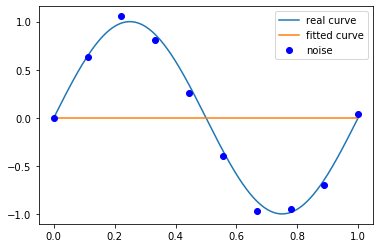

In [265]:
# M=0
pars_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.34876166  0.67438083]


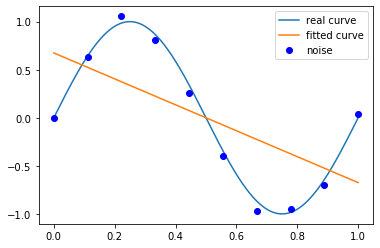

In [264]:
# M=1
pars_lsq_1 = fitting(M=1)

Fitting Parameters: [ 21.07651925 -31.61477888  10.64664006  -0.05419021]


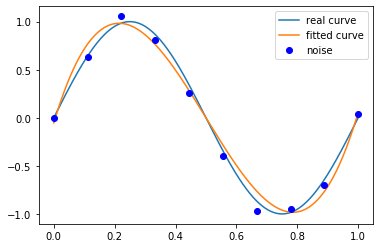

In [247]:
# M=3
pars_lsq_3 = fitting(M=3)

Fitting Parameters: [-3.50069823e+01  1.57531420e+02 -2.39484331e+02  1.03048530e+02
  3.95696989e+01  1.10277430e+01 -4.31219765e+01  1.58539686e-01
  6.27735815e+00 -9.38101718e-25]


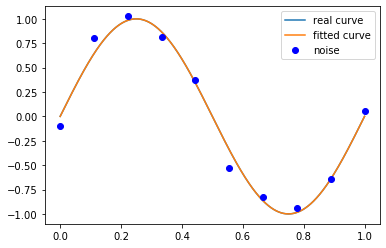

In [267]:
# M=9
pars_lsq_9 = fitting(M=9)

## 正则化

当M=9时，结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

结构风险模型：Q(x)=1/N * Σ(h(xi)-yi)^2+λ||w||^2 ≈ 1/N * Σ( (h(xi)-yi)+np.sqrt(λ/N)* w )^2

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

L1: regularization * abs(pars)

L2: 0.5 * regularization * np.square(pars)

In [287]:
regularization = 0.0001

def residuals_func_regularization(pars, x, y):
    resid = fit_func(pars,x) - y
    resid = np.append(resid, np.sqrt(0.001) * pars)  # L2范数作为正则化项
    return resid

In [288]:
# 最小二乘法加正则化项
pars_init = np.random.rand(9+1)
pars_lsq_regularization = leastsq(
    residuals_func_regularization, pars_init, args=(x,y))

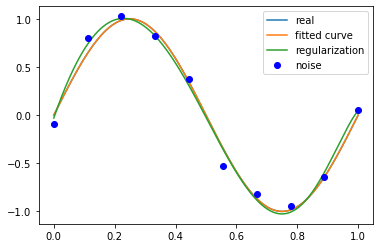

In [289]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(pars_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(pars_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()
plt.show()